<a href="https://colab.research.google.com/github/tec03/continuous_learning/blob/main/8_Bootstraping%26Ci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://moderndive.r-universe.dev/moderndive

# Chapter 8 Bootstrapping and Confidence Intervals

The term bootstrapping originates in the expression of “pulling oneself up by their bootstraps,” meaning to “succeed only by one’s own efforts or abilities.”

From a statistical perspective, bootstrapping alludes to constructing an approximation to the sampling distribution using only one sample.

In [ ]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/pennies_sample.csv'
import pandas as pd
df =  pd.read_csv(path)
df.head()

,ID,year
0,1,2002.0
1,2,1986.0
2,3,2017.0
3,4,1988.0
4,5,2008.0


In [ ]:
df['year'] = df['year'].astype(int)
df.head()

,ID,year
0,1,2002
1,2,1986
2,3,2017
3,4,1988
4,5,2008


### 1. Understanding the Average Year on US Pennies in 2019



This question is asking for the average minting year of all US pennies that were actively being used in the United States in the year 2019. However, gathering every single penny in circulation and calculating the exact average is practically impossible. Instead, we will use sampling to estimate this average.

#### 1.1 What Does This Mean?

* Each US penny has a year of minting printed on it (e.g., 1982, 1995, 2005).
* We are interested in the average of these years for all pennies in use in 2019.
* Instead of calculating this value for all pennies, we will estimate it using a sample of 50 pennies.

#### 1.2 Why Use a Sample?

* Collecting all pennies in circulation is impractical.
* Instead, we can collect a random representative sample of 50 pennies.
* We record the year of minting of each penny in this sample.
* The average of these 50 years will be our estimate for the average year on US pennies in 2019.

#### 1.3 Example Calculation:

1. Collect 50 pennies.
2. Record their minting years: 2000, 1985, 2012, 1978, 1995, ..., 2015

3. Calculate the average of these years:

   $$
   \text{Average Year} = \frac{2000 + 1985 + 2012 + 1978 + 1995 + \ldots + 2015}{50}
   $$

#### 1.4 Why This Makes Sense:

* The average of a representative sample is a good estimate of the average for the whole population.
* A higher average year suggests that most pennies in circulation are newer.
* A lower average year suggests that a mix of older pennies is still widely used.


#### 1.5 Exploratory data analysis.

Average Year on US Pennies (Sample of 50): 1995.44


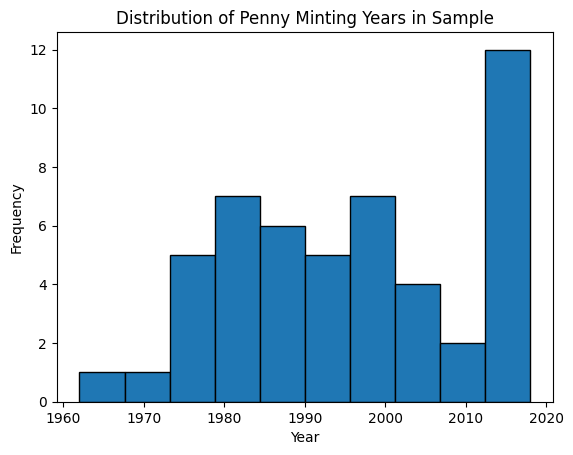

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


years = df['year']

average_year = np.mean(years)
print("Average Year on US Pennies (Sample of 50):", average_year)

# Visualizing the distribution
plt.hist(years, bins=10, edgecolor='black')
plt.title('Distribution of Penny Minting Years in Sample')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

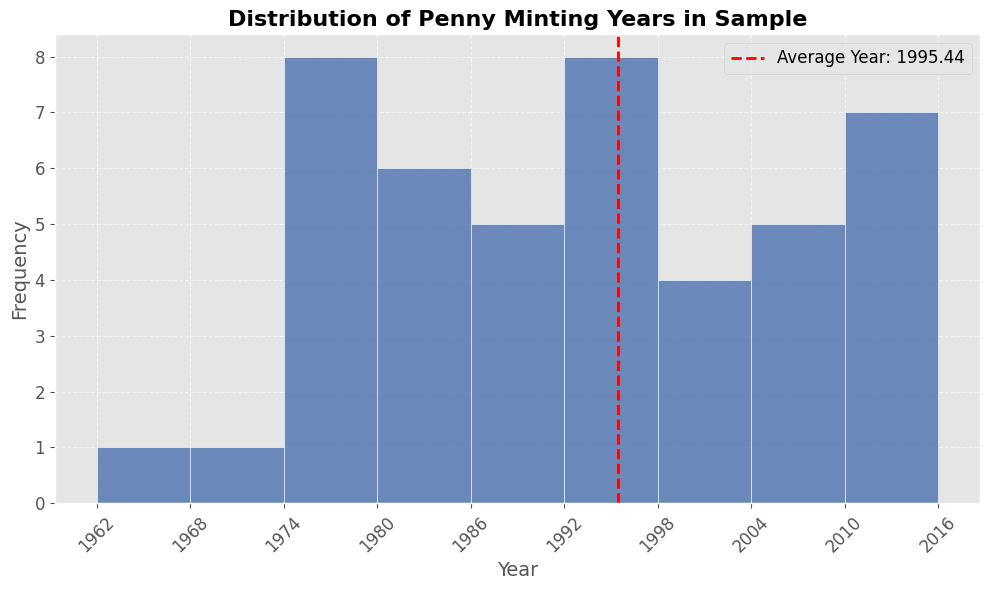

In [ ]:

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram with automatic binning by year
min_year = int(years.min())
max_year = int(years.max())
bins = np.arange(min_year, max_year + 1, 6)

counts, bins, patches = ax.hist(years, bins=bins, edgecolor='white', color='#4c72b0', alpha=0.8)

# Adding vertical line for average year
ax.axvline(average_year, color='red', linestyle='--', linewidth=2, label=f'Average Year: {average_year:.2f}')

# Setting x-ticks as integers for each year (showing all bin edges)
ax.set_xticks(bins)
ax.set_xticklabels([str(int(b)) for b in bins], fontsize=12, rotation=45)

# Customizing the plot
ax.set_title('Distribution of Penny Minting Years in Sample', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)

# Adjusting ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

- ✨ The point estimate of interest in this analysis is the sample mean, denoted as $ \bar{x} = 1995.44$.
- ✨ This value serves as an estimate of the population mean year ($\mu$) of all U.S. pennies.

In other words, the sample mean provides our *best estimate* of the average minting year of U.S. pennies across the entire population based on the observed sample.


- ✨ Such estimates are *prone to sampling variation.*
    - take too many samples. OR
    - use a single sample - using a technique known as *bootstrap resampling with replacement*.

In [ ]:
# Random resampling with replacement
resampled_years = np.random.choice(years, size=50, replace=True)
resampled_years_df = pd.DataFrame({'year': resampled_years})

resampled_years_df.head()

,year
0,1979
1,1979
2,1985
3,2015
4,2018


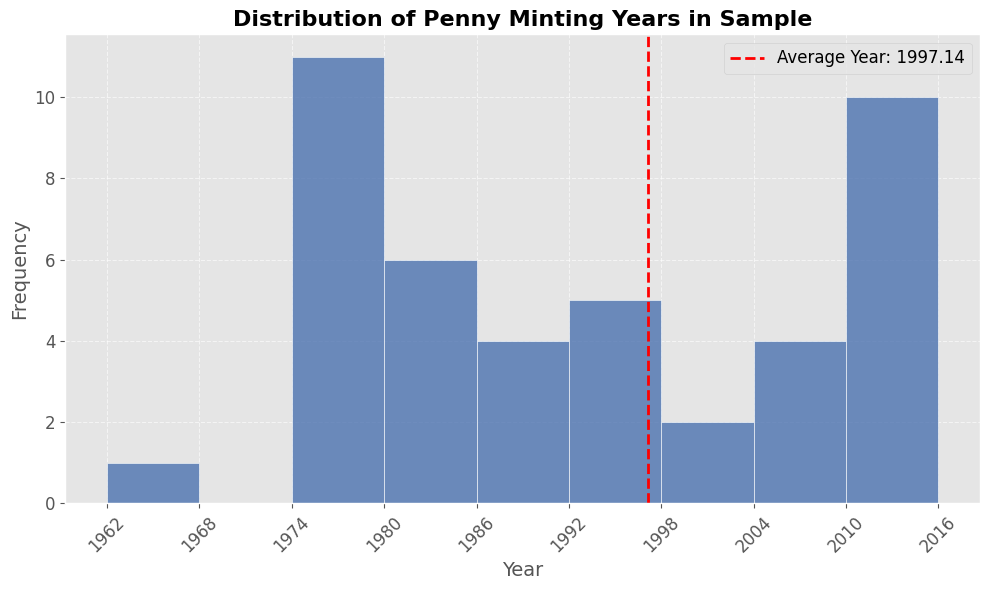

In [ ]:
n_year = resampled_years_df['year']
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram with automatic binning by year
min_year = int(n_year.min())
max_year = int(n_year.max())
bins = np.arange(min_year, max_year + 1, 6)

counts, bins, patches = ax.hist(n_year, bins=bins, edgecolor='white', color='#4c72b0', alpha=0.8)

n_average_year = np.mean(n_year)

# Adding vertical line for average year
ax.axvline(n_average_year, color='red', linestyle='--', linewidth=2, label=f'Average Year: {n_average_year:.2f}')

# Setting x-ticks as integers for each year (showing all bin edges)
ax.set_xticks(bins)
ax.set_xticklabels([str(int(b)) for b in bins], fontsize=12, rotation=45)

# Customizing the plot
ax.set_title('Distribution of Penny Minting Years in Sample', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)

# Adjusting ticks for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

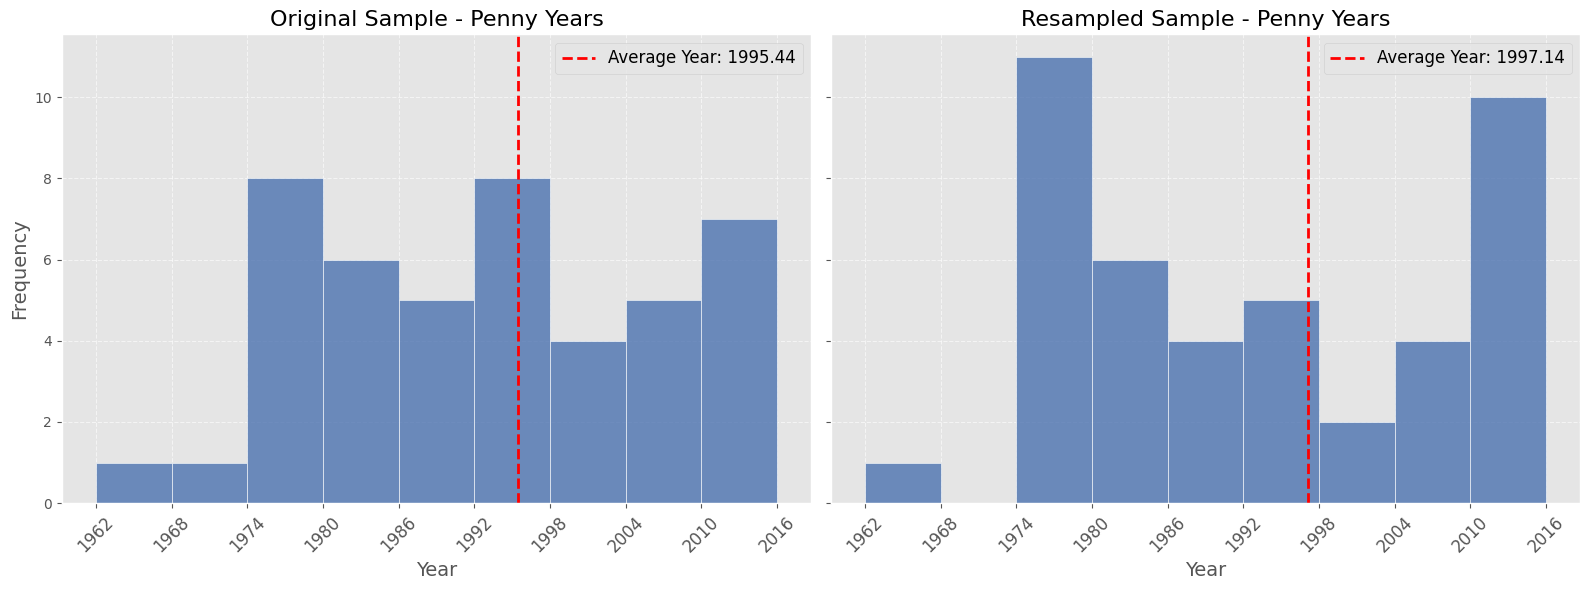

In [ ]:
original_df = df['year']
resampled_df = resampled_years_df['year']

# Calculating the average years
average_year = np.mean(years)
resampled_average_year = np.mean(resampled_years)

# Plotting side-by-side histograms with shared y-axis
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Original Data Histogram
ax1.hist(years, bins=np.arange(int(years.min()), int(years.max()) + 1, 6), edgecolor='white', color='#4c72b0', alpha=0.8)
ax1.axvline(average_year, color='red', linestyle='--', linewidth=2, label=f'Average Year: {average_year:.2f}')
ax1.set_title('Original Sample - Penny Years', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(fontsize=12)
ax1.set_xticks(bins)
ax1.set_xticklabels([str(int(b)) for b in bins], fontsize=12, rotation=45)

# Resampled Data Histogram
ax2.hist(resampled_years, bins=np.arange(int(resampled_years.min()), int(resampled_years.max()) + 1, 6), edgecolor='white', color='#4c72b0', alpha=0.8)
ax2.axvline(resampled_average_year, color='red', linestyle='--', linewidth=2, label=f'Average Year: {resampled_average_year:.2f}')
ax2.set_title('Resampled Sample - Penny Years', fontsize=16)
ax2.set_xlabel('Year', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(fontsize=12)
ax2.set_xticks(bins)
ax2.set_xticklabels([str(int(b)) for b in bins], fontsize=12, rotation=45)

plt.tight_layout()
plt.show()


- Note that the 50 new values of resample will almost certainly not be the same as the original one,  given the inherent randomness.
- Observe the Figures that the general shapes of both distributions of year are roughly similar, they are NOT identical.

#### 1.6 Resampling 35 times!!!

In [ ]:
resamples_data = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/pennies_resamples.csv'
df_resamples = pd.read_csv(resamples_data)
df_resamples.head()

,Resampled penny #,Arianna,Artemis,Bea,Camryn,Cassandra,Cindy,Claire,Dahlia,Dan,...,Noa,Nox,Olivia,Priya,Sarah,Sofia,Sunshihe,Taylor,Tim,Tina
0,1,1988,2018,2016,2002,2015,1985,1996,1985,2017,...,1976,2017,1992,2013,2006,2002,2016,1994,2015,1979
1,2,2002,1988,1971,1997,1976,2017,2015,2008,1985,...,1962,2017,2017,1974,1976,2015,1979,2006,1996,2017
2,3,2015,1999,1986,2002,2015,2017,1981,1983,1979,...,1986,1978,1993,2013,1981,1997,2017,2002,1981,1981
3,4,1998,2015,2002,2013,1981,2000,2015,2015,1988,...,1992,2016,1985,1997,2015,2016,2006,1994,2015,1983
4,5,1979,1962,1992,1997,1988,2008,2015,2008,1985,...,1996,1962,1979,2000,1976,1996,2000,1976,1981,2015


In [ ]:
df_resamples.shape #35 friends, did experiment - sample size 50

(50, 36)

In [ ]:
friends_means = df_resamples.mean()
friends_means

,0
Resampled penny #,25.50
Arianna,1992.50
Artemis,1996.42
Bea,1996.32
Camryn,1996.90
Cassandra,1991.22
Cindy,1995.48
Claire,1995.52
Dahlia,1998.48
Dan,1993.86


In [ ]:
friends_means = friends_means.iloc[1:]
friends_means = friends_means.to_frame(name='ExpMean')
friends_means

,ExpMean
Arianna,1992.50
Artemis,1996.42
Bea,1996.32
Camryn,1996.90
Cassandra,1991.22
Cindy,1995.48
Claire,1995.52
Dahlia,1998.48
Dan,1993.86
Eindra,1993.56


In [ ]:
n_year = friends_means['ExpMean']
n_year.min()

1989.46

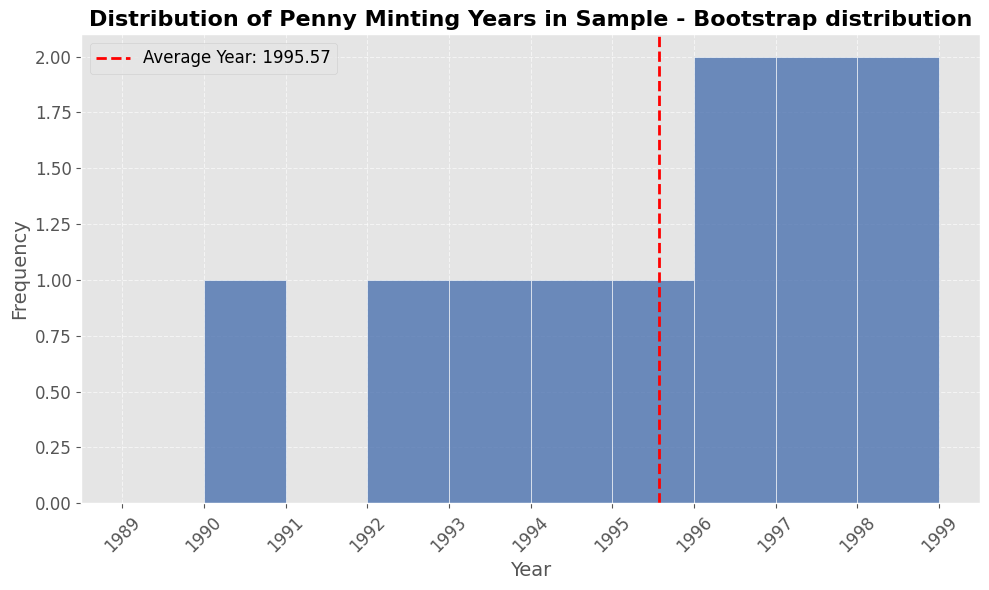

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram with automatic binning by year
min_year = int(n_year.min())
max_year = int(n_year.max())
bins = np.arange(min_year, max_year + 1, 1)

counts, bins, patches = ax.hist(years,  bins = bins, edgecolor='white', color='#4c72b0', alpha=0.8)

n_average_year = np.mean(n_year)

# Adding vertical line for average year
ax.axvline(n_average_year, color='red', linestyle='--', linewidth=2, label=f'Average Year: {n_average_year:.2f}')

# Setting x-ticks as integers for each year (showing all bin edges)
ax.set_xticks(bins)
ax.set_xticklabels([str(int(b)) for b in bins], fontsize=12, rotation=45)



ax.set_title('Distribution of Penny Minting Years in Sample - Bootstrap distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

This statistical procedure known as bootstrap resampling with replacement.


## 2. Computer simulation of resampling

In [ ]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/pennies_sample.csv'
pennies_df =  pd.read_csv(path)


pennies_sample =  pennies_df['year']


reps = 1
sample_size = 50

# Performing resampling with replacement, for reps replicates
resampled_data = {
    f"Replicate_{i+1}": np.random.choice(pennies_sample, size=sample_size, replace=True)
    for i in range(reps)
}


# Creating a DataFrame to store the resampled values
virtual_resample_df = pd.DataFrame(resampled_data)

virtual_resample_df.shape

(50, 1)

In [ ]:
virtual_resample_df.head()

,Replicate_1
0,1988.0
1,1979.0
2,2015.0
3,2004.0
4,2016.0


Now try with 35 friends - Later try with 1,000 friends.

In [ ]:
reps = 35 # friends - Later try with 1,000 friends.
sample_size = 50

# Performing resampling with replacement, for reps replicates
resampled_data = {
    f"Replicate_{i+1}": np.random.choice(pennies_sample, size=sample_size, replace=True)
    for i in range(reps)
}


# Creating a DataFrame to store the resampled values
virtual_resample_df = pd.DataFrame(resampled_data)

virtual_resample_df.shape

(50, 35)

In [ ]:
virtual_means = virtual_resample_df.mean()
virtual_means

,0
Replicate_1,1993.16
Replicate_2,1995.16
Replicate_3,1997.26
Replicate_4,1997.06
Replicate_5,1994.50
Replicate_6,1998.40
Replicate_7,1994.16
Replicate_8,1993.22
Replicate_9,1996.14
Replicate_10,1990.46


In [ ]:
virtual_means = virtual_means.to_frame(name='ExpMean')
virtual_means

,ExpMean
Replicate_1,1993.16
Replicate_2,1995.16
Replicate_3,1997.26
Replicate_4,1997.06
Replicate_5,1994.50
Replicate_6,1998.40
Replicate_7,1994.16
Replicate_8,1993.22
Replicate_9,1996.14
Replicate_10,1990.46


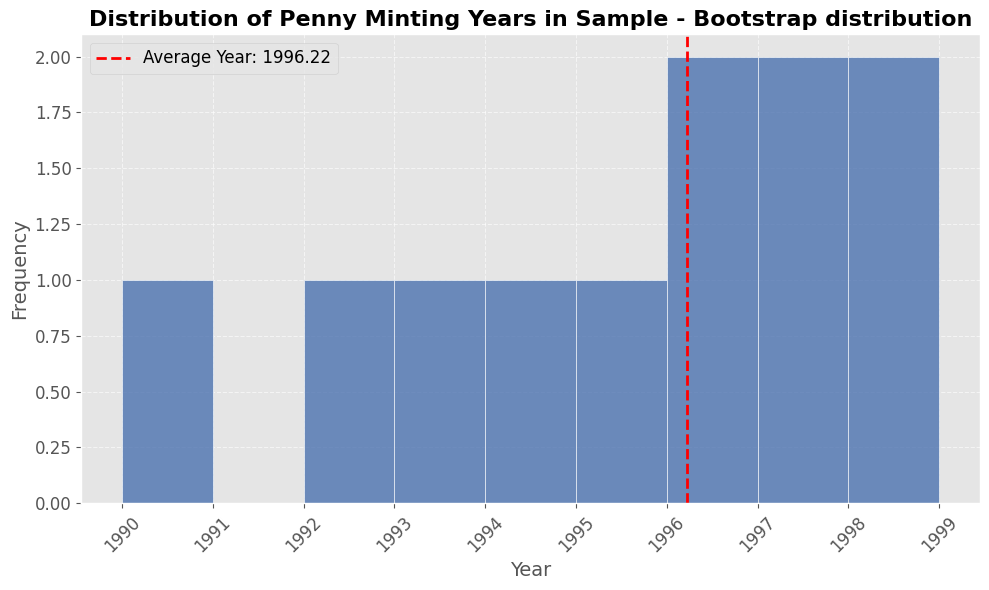

In [ ]:
n_year = virtual_means['ExpMean']

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram with automatic binning by year
min_year = int(n_year.min())
max_year = int(n_year.max())
bins = np.arange(min_year, max_year + 1, 1)

counts, bins, patches = ax.hist(years,  bins = bins, edgecolor='white', color='#4c72b0', alpha=0.8)

n_average_year = np.mean(n_year)

# Adding vertical line for average year
ax.axvline(n_average_year, color='red', linestyle='--', linewidth=2, label=f'Average Year: {n_average_year:.2f}')

# Setting x-ticks as integers for each year (showing all bin edges)
ax.set_xticks(bins)
ax.set_xticklabels([str(int(b)) for b in bins], fontsize=12, rotation=45)



ax.set_title('Distribution of Penny Minting Years in Sample - Bootstrap distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

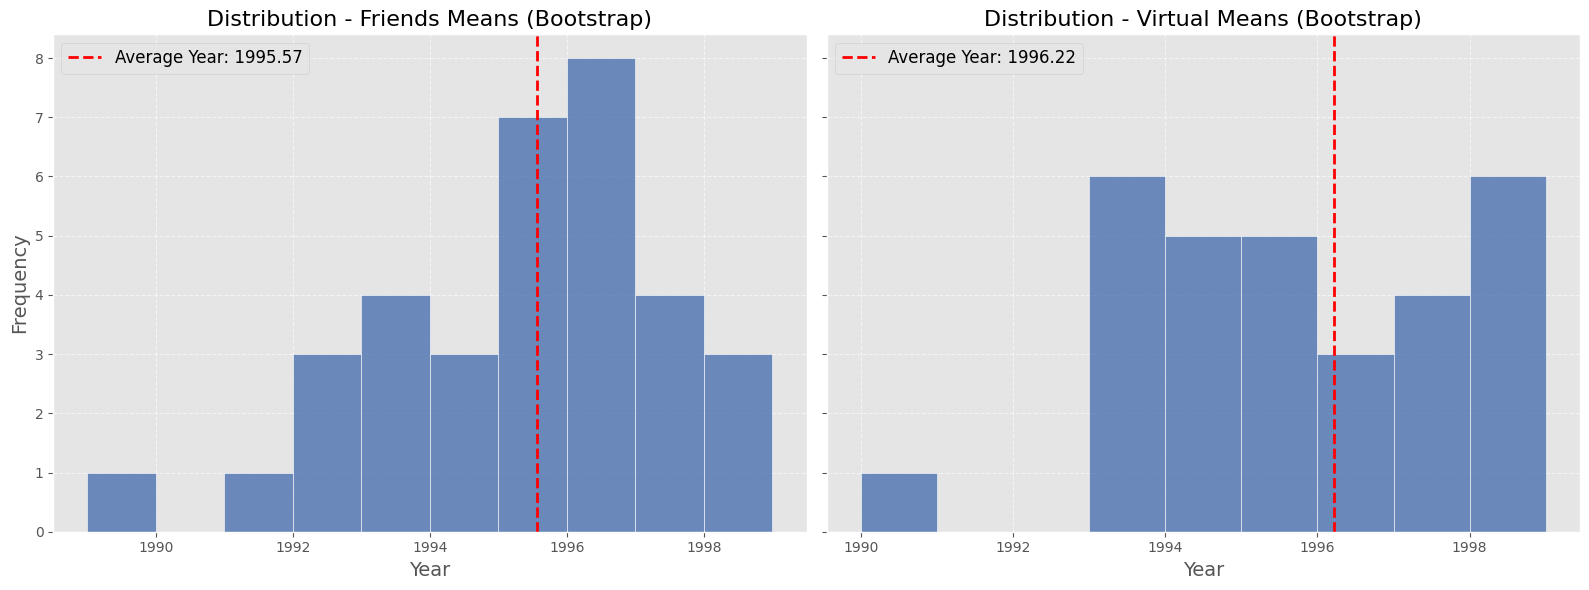

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


n_year_1 = friends_means['ExpMean']
n_year_2 = virtual_means['ExpMean']

# Setting up the plot
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# First Histogram (Friends Means)
bins_1 = np.arange(int(n_year_1.min()), int(n_year_1.max()) + 1, 1)
ax1.hist(n_year_1, bins=bins_1, edgecolor='white', color='#4c72b0', alpha=0.8)
n_average_year_1 = np.mean(n_year_1)
ax1.axvline(n_average_year_1, color='red', linestyle='--', linewidth=2, label=f'Average Year: {n_average_year_1:.2f}')
ax1.set_title('Distribution - Friends Means (Bootstrap)', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(fontsize=12)

# Second Histogram (Virtual Means)
bins_2 = np.arange(int(n_year_2.min()), int(n_year_2.max()) + 1, 1)
ax2.hist(n_year_2, bins=bins_2, edgecolor='white', color='#4c72b0', alpha=0.8)
n_average_year_2 = np.mean(n_year_2)
ax2.axvline(n_average_year_2, color='red', linestyle='--', linewidth=2, label=f'Average Year: {n_average_year_2:.2f}')
ax2.set_title('Distribution - Virtual Means (Bootstrap)', fontsize=16)
ax2.set_xlabel('Year', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()


- They are somewhat similar, but not identical.
- Bootstrap distributions are constructed by taking multiple resamples from a single sample: in this case, the 50 original pennies from the bank.
-  These distributions allow us to study the *effect of sampling variation on our estimates* of the true population mean, in this case the true mean year for all US pennies.



### Chief Difference Between a Bootstrap Distribution and a Sampling Distribution:

| Aspect              | **Bootstrap Distribution**                                                                                                | **Sampling Distribution**                                                                                                             |
| ------------------- | ------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Definition**      | Distribution of a statistic (e.g., mean, median) obtained by resampling (with replacement) from the **same sample data.** | Distribution of a statistic (e.g., mean, proportion) calculated from **multiple independent random samples** from the **population.** |
| **Source of Data**  | Derived from **one sample** by resampling (with replacement) repeatedly.                                                  | Derived from **multiple independent samples** drawn directly from the population.                                                     |
| **Purpose**         | Used to estimate the variability of a statistic (standard error, confidence intervals) without needing the population.    | Used to understand the theoretical behavior of a statistic (e.g., Central Limit Theorem).                                             |
| **Practical Usage** | Commonly used when the population distribution is unknown or when data collection is expensive.                           | Represents the theoretical behavior of a statistic across all possible samples from the population.                                   |
| **Dependence**      | Dependent on the observed sample (since resampling is from the same sample).                                              | Independent of any single sample, depends on the entire population.                                                                   |
| **Example**         | Calculating a 95% confidence interval for the mean of a sample using bootstrap resampling.                                | Deriving the sampling distribution of the sample mean using many independent samples from the population.                             |

### Practical Understanding:

* A **bootstrap distribution** is a practical, data-driven approach for estimating the distribution of a statistic by resampling a single available sample.
* A **sampling distribution** is a theoretical concept describing the distribution of a statistic across all possible samples of a given size from a population.



## 3. Understanding confidence intervals

- Between which two years would you say that “most” sample means lie?
    - While this question is somewhat subjective, saying that most sample means lie between 1992 and 2000 would not be unreasonable.
    - Our proposed interval of 1992 to 2000 was constructed by eye and was thus somewhat subjective.
- We now introduce two methods for constructing such intervals in a more exact fashion:
    - the percentile method and
    - the standard error method.

### 3.1 Percentile method

The percentile method is a non-parametric approach to constructing confidence intervals, making no assumptions about the shape of the underlying distribution.

The values of the percentiles correspond to the tail areas that leave the desired confidence level (e.g., 2.5% in each tail for 95%).

- 90% - compute the 5th and 95th percentiles of the bootstrap distribution.
- 95% - compute the 2.5th and 97.5th percentiles of the bootstrap distribution.
- 99% - compute the 0.5th and 99.5th percentiles of the bootstrap distribution.


### 3.2  Standard error method

For any normally distributed variable:
- 68% of the values fall within ± 1 standard deviation of the mean. (x ± 1 x SE)
- 95% of the values fall within ± 1.96 standard deviations of the mean. (x ± 1.96 x SE)
- 99.7% of the values fall within ± 3 standard deviations of the mean. (x ± 3 x SE)


## 4 Constructing confidence intervals

In [ ]:
vir_std = virtual_means.std()
vir_std

,0
ExpMean,2.369374


In [ ]:
virtual_means['ExpMean'].describe()

,ExpMean
count,35.000000
mean,1996.222857
std,2.369374
min,1990.460000
25%,1994.460000
50%,1996.140000
75%,1998.450000
max,1999.920000


### 4.1 Two methods to create (50 * 1,000 = 50,000) Bootstrap Resamples:

In [ ]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/pennies_sample.csv'

pennies_sample =  pd.read_csv(path)
pennies_sample = pennies_sample['year']
pennies_sample

,year
0,2002.0
1,1986.0
2,2017.0
3,1988.0
4,2008.0
5,1983.0
6,2008.0
7,1996.0
8,2004.0
9,2000.0


#### 4. 1. 1 Original Workflow using pandas -  Generating 1000 Bootstrap Resamples (50 * 1,000 = 50,000)

In [ ]:
resampled_data = pd.DataFrame({
    f'Replicate_{i+1}': np.random.choice(pennies_sample, size=50, replace=True)
    for i in range(1000)
})

resampled_data

,Replicate_1,Replicate_2,Replicate_3,Replicate_4,Replicate_5,Replicate_6,Replicate_7,Replicate_8,Replicate_9,Replicate_10,...,Replicate_991,Replicate_992,Replicate_993,Replicate_994,Replicate_995,Replicate_996,Replicate_997,Replicate_998,Replicate_999,Replicate_1000
0,2008.0,2006.0,1979.0,1978.0,1999.0,2017.0,1962.0,2016.0,2015.0,1995.0,...,1983.0,1995.0,2018.0,1997.0,2004.0,1985.0,1996.0,2017.0,1986.0,2013.0
1,1990.0,1985.0,1995.0,1997.0,1962.0,2018.0,2015.0,2013.0,1995.0,1992.0,...,2015.0,2015.0,1979.0,1988.0,1994.0,1976.0,2018.0,2004.0,2015.0,1983.0
2,1997.0,1976.0,2013.0,1981.0,2006.0,2017.0,2017.0,1996.0,2015.0,2013.0,...,1978.0,2015.0,2017.0,1979.0,1985.0,1992.0,2017.0,2015.0,1985.0,1996.0
3,1981.0,2004.0,2002.0,1988.0,2006.0,2015.0,1976.0,1997.0,1983.0,2015.0,...,1974.0,2017.0,1993.0,1997.0,2015.0,1993.0,1971.0,1971.0,1983.0,1979.0
4,1979.0,1996.0,1979.0,1978.0,1995.0,2008.0,1978.0,1983.0,2017.0,1990.0,...,1979.0,2006.0,1998.0,1993.0,1983.0,1988.0,2002.0,2017.0,1974.0,2002.0
5,1988.0,1999.0,1992.0,2006.0,2008.0,1997.0,1997.0,1962.0,2015.0,2013.0,...,2015.0,1976.0,1988.0,1992.0,1979.0,2016.0,1997.0,1962.0,2015.0,2018.0
6,1985.0,2017.0,2018.0,2004.0,1983.0,2004.0,1998.0,1982.0,2015.0,1995.0,...,2015.0,2008.0,2008.0,1976.0,2016.0,1981.0,1997.0,2018.0,1978.0,1996.0
7,1985.0,2015.0,2002.0,1996.0,2016.0,1996.0,1998.0,1974.0,2004.0,2006.0,...,1981.0,2015.0,1998.0,2008.0,2018.0,1988.0,1979.0,1990.0,1998.0,2000.0
8,1986.0,1985.0,2002.0,1979.0,1981.0,2008.0,1983.0,2004.0,1999.0,2008.0,...,1990.0,1982.0,2008.0,1995.0,1988.0,1978.0,2017.0,1999.0,2006.0,2015.0
9,1983.0,2018.0,1983.0,1998.0,1996.0,1997.0,2017.0,1978.0,1986.0,1979.0,...,1988.0,1988.0,1990.0,2008.0,1981.0,1992.0,2015.0,1999.0,2013.0,1979.0


In [ ]:
# Calculating the mean for each resample
bootstrap_means = resampled_data.apply(np.mean, axis=0)
bootstrap_means

,0
Replicate_1,1994.00
Replicate_2,2000.94
Replicate_3,1993.86
Replicate_4,1995.58
Replicate_5,1996.18
...,...
Replicate_996,1995.64
Replicate_997,1998.14
Replicate_998,1996.42
Replicate_999,1994.84


#### 4. 1. 2 Enhanced Workflow (infer-like) -  Generating 1000 Bootstrap Resamples (50 * 1,000 = 50,000)

In [ ]:
bootstrap_distribution = pd.DataFrame({
    'replicate': np.repeat(np.arange(1, 1001), 50),
    'year': np.random.choice(pennies_sample, size=50 * 1000, replace=True)
})
bootstrap_distribution

,replicate,year
0,1,1979.0
1,1,2015.0
2,1,2004.0
3,1,2016.0
4,1,1997.0
...,...,...
49995,1000,2017.0
49996,1000,2015.0
49997,1000,1978.0
49998,1000,1999.0


In [ ]:
# Calculating the mean for each resample
bootstrap_distribution_means = (
    bootstrap_distribution.groupby('replicate')['year'].mean().reset_index(name='mean_year')
)

bootstrap_distribution_means

,replicate,mean_year
0,1,1995.22
1,2,1992.48
2,3,1996.18
3,4,1997.90
4,5,1993.14
...,...,...
995,996,1998.26
996,997,1996.42
997,998,1996.74
998,999,1997.48


#### 4. 1. 3 Visualizing the Bootstrap Distribution

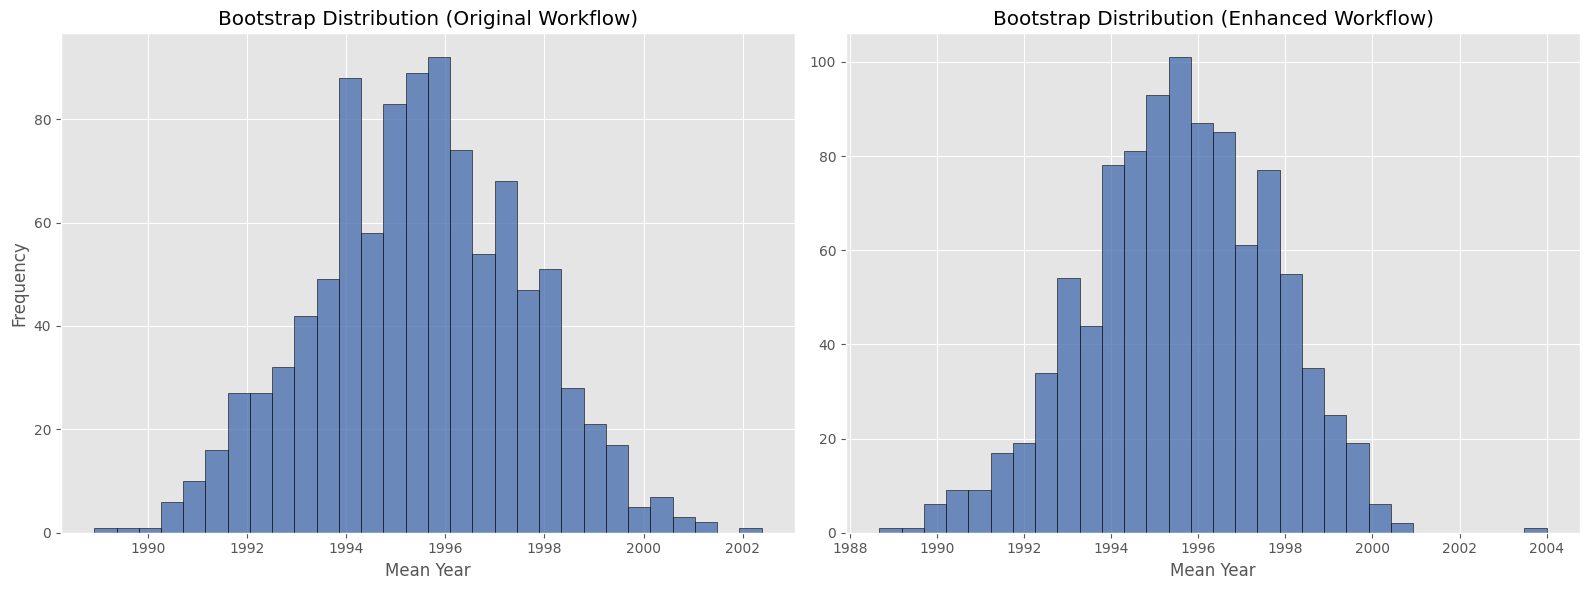

In [ ]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original Workflow Histogram
ax1.hist(bootstrap_means, bins=30, edgecolor='black', color='#4c72b0', alpha=0.8)
ax1.set_title('Bootstrap Distribution (Original Workflow)')
ax1.set_xlabel('Mean Year')
ax1.set_ylabel('Frequency')

# Enhanced Workflow Histogram
ax2.hist(bootstrap_distribution_means['mean_year'], bins=30, edgecolor='black', color='#4c72b0', alpha=0.8)
ax2.set_title('Bootstrap Distribution (Enhanced Workflow)')
ax2.set_xlabel('Mean Year')

plt.tight_layout()
plt.show()


#### 4.3 Percentile method with infer

In [ ]:
pennies_sample  # orginal data

,year
0,2002.0
1,1986.0
2,2017.0
3,1988.0
4,2008.0
5,1983.0
6,2008.0
7,1996.0
8,2004.0
9,2000.0


In [ ]:
# Enhanced Workflow (infer-like)
bootstrap_distribution = pd.DataFrame({
    'replicate': np.repeat(np.arange(1, 1001), 50),
    'year': np.random.choice(pennies_sample, size=50 * 1000, replace=True)
})
bootstrap_distribution

,replicate,year
0,1,1976.0
1,1,2006.0
2,1,1995.0
3,1,2006.0
4,1,2008.0
...,...,...
49995,1000,2015.0
49996,1000,1979.0
49997,1000,1978.0
49998,1000,2015.0


In [ ]:
# Calculating the mean for each resample
bootstrap_distribution_means = (
    bootstrap_distribution.groupby('replicate')['year'].mean().reset_index(name='mean_year')
)
bootstrap_distribution_means


,replicate,mean_year
0,1,1997.28
1,2,1996.56
2,3,1990.74
3,4,1995.20
4,5,1994.52
...,...,...
995,996,1993.28
996,997,1995.18
997,998,1996.70
998,999,1996.10


In [ ]:
# Calculating the 95% Confidence Interval using the Percentile Method
percentile_ci = np.percentile(bootstrap_distribution_means['mean_year'], [2.5, 97.5])
percentile_ci

array([1991.3995, 1999.7   ])

In [ ]:
print(f"Percentile Method 95% Confidence Interval: Lower CI: {percentile_ci[0]:.2f}, Upper CI: {percentile_ci[1]:.2f}")

Percentile Method 95% Confidence Interval: Lower CI: 1991.40, Upper CI: 1999.70


- The CI will not be exactly the same  if 10 persons independently perform the same bootstrap experiment on the same dataset.

- This means the *distribution of bootstrap sample means* will also be slightly different for each person.

-  As a result, the *2.5th and 97.5th percentiles* of the bootstrap distribution will differ, leading to slightly different confidence intervals.

- The confidence intervals should be *very similar but not exactly the same*, especially if the sample size and the number of resamples (1000) are large.

-  The larger the sample size and the number of resamples, the more consistent the confidence intervals will be across different persons.


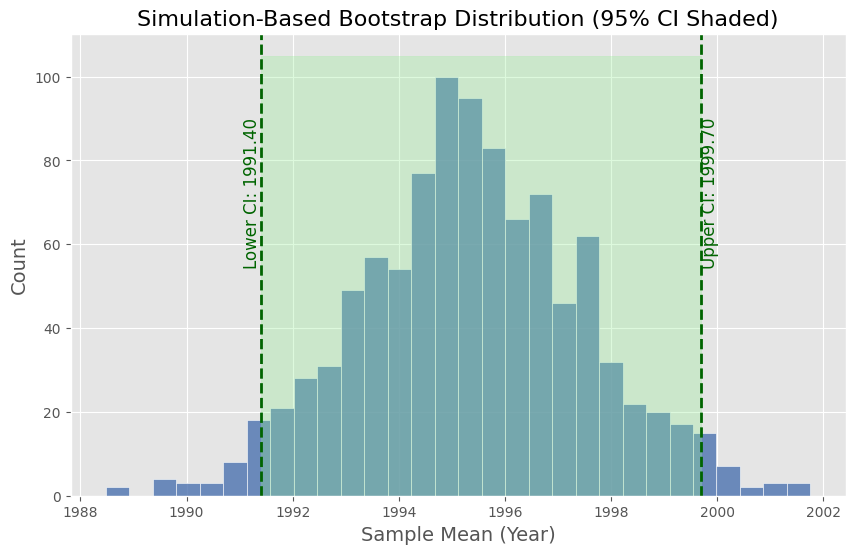

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))


ax.hist(bootstrap_distribution_means['mean_year'], bins=30, edgecolor='white', color='#4c72b0', alpha=0.8)


ax.axvline(percentile_ci[0], color='darkgreen', linestyle='--', linewidth=2)
ax.axvline(percentile_ci[1], color='darkgreen', linestyle='--', linewidth=2)
ax.fill_betweenx(
    y=[0, ax.get_ylim()[1]],
    x1=percentile_ci[0], x2=percentile_ci[1],
    color='lightgreen', alpha=0.3
)

# Adding text labels for the CI values
ax.text(percentile_ci[0], ax.get_ylim()[1] * 0.5, f"Lower CI: {percentile_ci[0]:.2f}", fontsize=12, color='darkgreen', ha='right', rotation = 90)
ax.text(percentile_ci[1], ax.get_ylim()[1] * 0.5, f"Upper CI: {percentile_ci[1]:.2f}", fontsize=12, color='darkgreen', ha='left', rotation = 90)


ax.set_title('Simulation-Based Bootstrap Distribution (95% CI Shaded)', fontsize=16)
ax.set_xlabel('Sample Mean (Year)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

#### 4.4 Standard error method with infer

- In the case of the bootstrap distribution, the standard deviation has a special name: the standard error.

- Approximately *95% of the values of the bootstrap distribution* will lie within *± 1.96 standard errors (SE) of the sample mean ( $\bar{x}$ )*.



$$
\bar{x} \pm 1.96 \times SE = \left( \bar{x} - 1.96 \times SE, \, \bar{x} + 1.96 \times SE \right)
$$

Where:

  *  $\bar{x}$ is the *sample mean* of the bootstrap distribution.
  
  * $SE$ is the *standard error of the bootstrap distribution*, (standard deviation of the bootstrap sample means).

  * $1.96$ is the critical value for a *95% confidence level* from the standard normal distribution.



In [ ]:
pennies_sample  # original samples

,year
0,2002.0
1,1986.0
2,2017.0
3,1988.0
4,2008.0
5,1983.0
6,2008.0
7,1996.0
8,2004.0
9,2000.0


In [ ]:
# Enhanced Workflow (infer-like)
bootstrap_distribution = pd.DataFrame({
    'replicate': np.repeat(np.arange(1, 1001), 50),
    'year': np.random.choice(pennies_sample, size=50 * 1000, replace=True)
})

bootstrap_distribution

,replicate,year
0,1,1978.0
1,1,1962.0
2,1,2015.0
3,1,2000.0
4,1,2015.0
...,...,...
49995,1000,1997.0
49996,1000,2018.0
49997,1000,1976.0
49998,1000,1986.0


In [ ]:
# Calculating the mean for each resample
bootstrap_distribution_means = (
    bootstrap_distribution.groupby('replicate')['year'].mean().reset_index(name='mean_year')
)
bootstrap_distribution_means

,replicate,mean_year
0,1,1993.78
1,2,1994.94
2,3,2000.34
3,4,1994.78
4,5,1993.30
...,...,...
995,996,1995.06
996,997,1999.38
997,998,1997.86
998,999,1993.74


In [ ]:
bootstrap_distribution_means.describe()

,replicate,mean_year
count,1000.000000,1000.000000
mean,500.500000,1995.461400
std,288.819436,2.105323
min,1.000000,1987.740000
25%,250.750000,1994.115000
50%,500.500000,1995.490000
75%,750.250000,1996.860000
max,1000.000000,2001.880000


In [ ]:
sample_mean = bootstrap_distribution_means['mean_year'].mean()
standard_error = bootstrap_distribution_means['mean_year'].std()


print(f"Mean: {sample_mean:.2f}, SE: {standard_error:.2f}")

Mean: 1995.46, SE: 2.11


In [ ]:
# Calculating the 95% CI using the formula: x̄ ± 1.96 × SE
ci_lower = sample_mean - 1.96 * standard_error
ci_upper = sample_mean + 1.96 * standard_error

print(f"Lower CI: {ci_lower:.2f}, Upper CI: {ci_upper:.2f}")

Lower CI: 1991.33, Upper CI: 1999.59


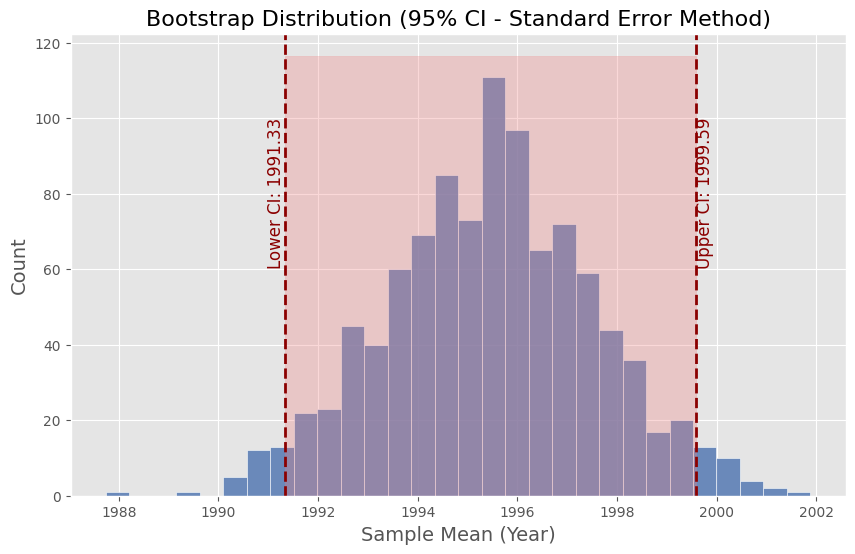

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(bootstrap_distribution_means['mean_year'], bins=30, edgecolor='white', color='#4c72b0', alpha=0.8)

ax.axvline(ci_lower, color='darkred', linestyle='--', linewidth=2)
ax.axvline(ci_upper, color='darkred', linestyle='--', linewidth=2)
ax.fill_betweenx(
    y=[0, ax.get_ylim()[1]],
    x1=ci_lower, x2=ci_upper,
    color='lightcoral', alpha=0.3
)

ax.text(ci_lower, ax.get_ylim()[1] * 0.5, f"Lower CI: {ci_lower:.2f}", fontsize=12, color='darkred', ha='right', rotation = 90)
ax.text(ci_upper, ax.get_ylim()[1] * 0.5, f"Upper CI: {ci_upper:.2f}", fontsize=12, color='darkred', ha='left', rotation = 90)

ax.set_title('Bootstrap Distribution (95% CI - Standard Error Method)', fontsize=16)
ax.set_xlabel('Sample Mean (Year)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

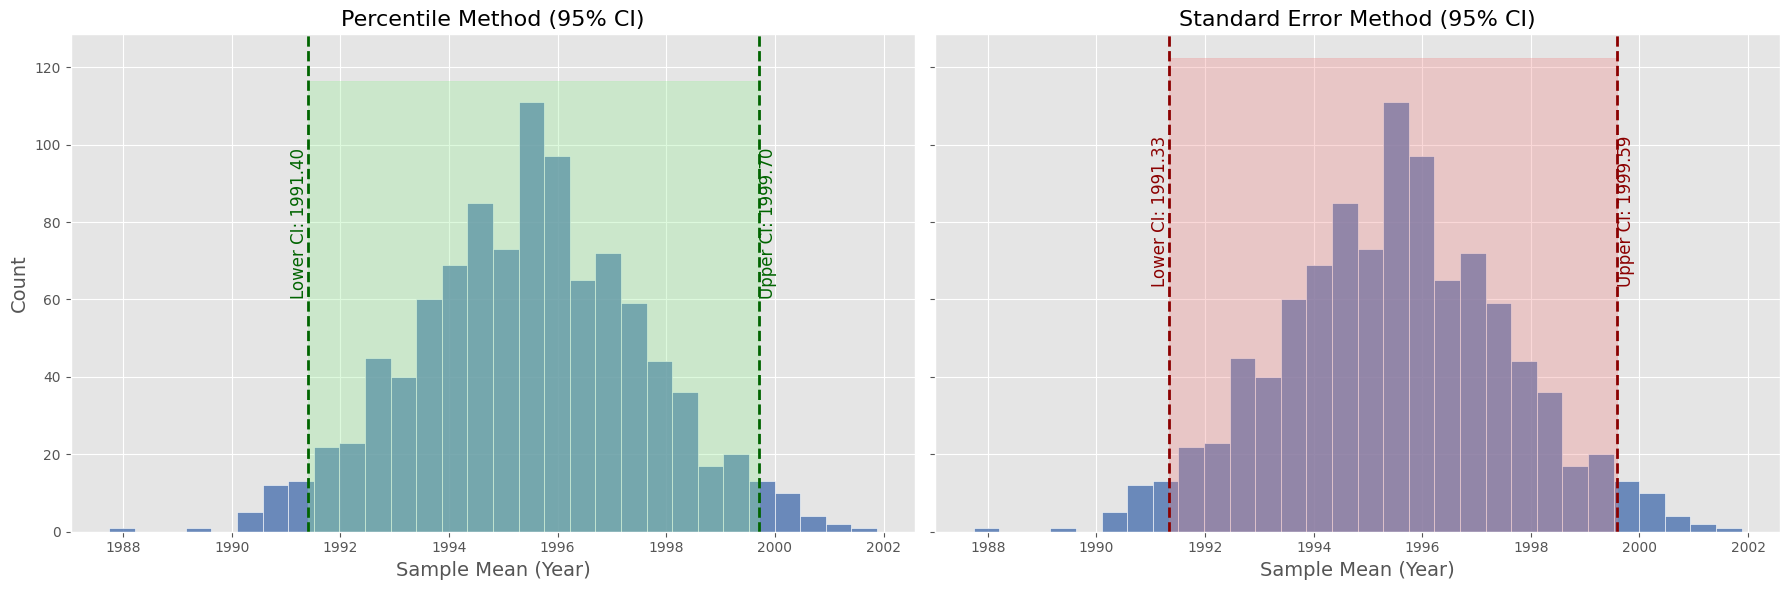

In [ ]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Percentile Method (Left)
ax1.hist(bootstrap_distribution_means['mean_year'], bins=30, edgecolor='white', color='#4c72b0', alpha=0.8)
ax1.axvline(percentile_ci[0], color='darkgreen', linestyle='--', linewidth=2)
ax1.axvline(percentile_ci[1], color='darkgreen', linestyle='--', linewidth=2)
ax1.fill_betweenx(y=[0, ax1.get_ylim()[1]], x1=percentile_ci[0], x2=percentile_ci[1], color='lightgreen', alpha=0.3)
ax1.text(percentile_ci[0], ax1.get_ylim()[1] * 0.5, f"Lower CI: {percentile_ci[0]:.2f}", fontsize=12, color='darkgreen', ha='right', rotation=90)
ax1.text(percentile_ci[1], ax1.get_ylim()[1] * 0.5, f"Upper CI: {percentile_ci[1]:.2f}", fontsize=12, color='darkgreen', ha='left', rotation=90)
ax1.set_title('Percentile Method (95% CI)', fontsize=16)
ax1.set_xlabel('Sample Mean (Year)', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

# Standard Error Method (Right)
ax2.hist(bootstrap_distribution_means['mean_year'], bins=30, edgecolor='white', color='#4c72b0', alpha=0.8)
ax2.axvline(ci_lower, color='darkred', linestyle='--', linewidth=2)
ax2.axvline(ci_upper, color='darkred', linestyle='--', linewidth=2)
ax2.fill_betweenx(y=[0, ax2.get_ylim()[1]], x1=ci_lower, x2=ci_upper, color='lightcoral', alpha=0.3)
ax2.text(ci_lower, ax2.get_ylim()[1] * 0.5, f"Lower CI: {ci_lower:.2f}", fontsize=12, color='darkred', ha='right', rotation=90)
ax2.text(ci_upper, ax2.get_ylim()[1] * 0.5, f"Upper CI: {ci_upper:.2f}", fontsize=12, color='darkred', ha='left', rotation=90)
ax2.set_title('Standard Error Method (95% CI)', fontsize=16)
ax2.set_xlabel('Sample Mean (Year)', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
print(f"Percentile Method 95% Confidence Interval: \tLower CI : {percentile_ci[0]:.2f}, Upper CI: {percentile_ci[1]:.2f}")
print(f"Standard error Method 95% Confidence Interval:  Lower CI : {ci_lower:.2f}, Upper CI: {ci_upper:.2f}")

Percentile Method 95% Confidence Interval: 	Lower CI : 1991.40, Upper CI: 1999.70
Standard error Method 95% Confidence Interval:  Lower CI : 1991.33, Upper CI: 1999.59


### 8.5 Interpreting confidence intervals

- The effectiveness of a confidence interval is judged by whether or not it contains the true value of the population parameter.
  - Did our net capture the fish?.
    - That can't be answered since we don't know the exact value of the population mean.
    - Can be answered using the bowl_data.

- What proportion of the bowl’s 2400 balls are red?

In [ ]:
bowl_data = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_n.csv'
bowl = pd.read_csv(bowl_data)
bowl

,ball_ID,color
0,1,white
1,2,white
2,3,white
3,4,red
4,5,white
...,...,...
2395,2396,white
2396,2397,red
2397,2398,white
2398,2399,white


In [ ]:
bowl.columns

Index(['ball_ID', 'color'], dtype='object')

In [ ]:
bowl_red = bowl[bowl['color'] == 'red']
bowl_red
prop = len(bowl_red)/len(bowl)
print(f"Red balls proporsion : {prop}")
print(f"The population proportion  is : {prop}")

Red balls proporsion : 0.375
The population proportion  is : 0.375


This means - 37.5% of the bowl’s balls are red.


**Case1 :** Take same of a person and see what is the proporsion - like “spear” from our fishing analogy.

In [ ]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_sample_1.csv'
bowl_sample_1 = pd.read_csv(path)
bowl_sample_1

,color
0,white
1,white
2,red
3,red
4,white
5,white
6,red
7,white
8,white
9,white


In [ ]:
bowl_sample_1_red = bowl_sample_1[bowl_sample_1['color'] == 'red']
bowl_sample_1_red
prop = len(bowl_sample_1_red)/len(bowl_sample_1)
print(f"Red balls proporsion in Sample 1: {prop}")
print(f"The population proportion of the Sample 1 is : {prop}")

Red balls proporsion in Sample 1: 0.42
The population proportion of the Sample 1 is : 0.42


**Case2 :** Percentile-method-based 95% confidence interval

In [ ]:
bowl_sample_1_list = bowl_sample_1['color'].tolist()
bowl_sample_1_list

['white',
 'white',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'red',
 'red',
 'red',
 'white',
 'red',
 'white',
 'red',
 'white',
 'red',
 'white',
 'red',
 'red',
 'red',
 'white']

In [ ]:
# Enhanced Workflow (infer-like)
bootstrap_distribution = pd.DataFrame({
    'replicate': np.repeat(np.arange(1, 1001), 50),
    'color': np.random.choice(bowl_sample_1_list, size=50 * 1000, replace=True)
})
bootstrap_distribution

,replicate,color
0,1,white
1,1,white
2,1,red
3,1,white
4,1,white
...,...,...
49995,1000,red
49996,1000,white
49997,1000,red
49998,1000,white


In [ ]:
bootstrap_distribution_red = bootstrap_distribution[bootstrap_distribution['color'] == 'red']
bootstrap_distribution_red

,replicate,color
2,1,red
5,1,red
8,1,red
9,1,red
10,1,red
...,...,...
49990,1000,red
49991,1000,red
49995,1000,red
49997,1000,red


In [ ]:
# Calculating the mean for each resample
bootstrap_distribution_counts = (
    bootstrap_distribution_red.groupby('replicate')['color'].count().reset_index(name='count')
)
bootstrap_distribution_counts

,replicate,count
0,1,18
1,2,29
2,3,17
3,4,22
4,5,21
...,...,...
995,996,21
996,997,23
997,998,25
998,999,25


In [ ]:
bootstrap_distribution_counts['Prop'] = bootstrap_distribution_counts['count'] / 50
bootstrap_distribution_counts

,replicate,count,Prop
0,1,18,0.36
1,2,29,0.58
2,3,17,0.34
3,4,22,0.44
4,5,21,0.42
...,...,...,...
995,996,21,0.42
996,997,23,0.46
997,998,25,0.50
998,999,25,0.50


In [ ]:
# Calculating the 95% Confidence Interval using the Percentile Method
percentile_ci = np.percentile(bootstrap_distribution_counts['Prop'], [2.5, 97.5])
percentile_ci

array([0.3 , 0.56])

In [ ]:
print(f"Percentile Method 95% Confidence Interval: Lower CI: {percentile_ci[0]:.2f}, Upper CI: {percentile_ci[1]:.2f}")

Percentile Method 95% Confidence Interval: Lower CI: 0.30, Upper CI: 0.56


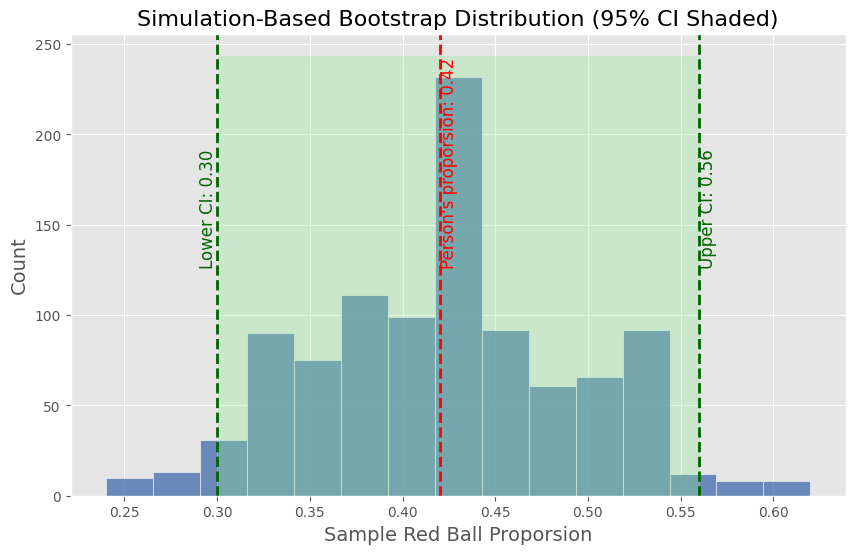

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))


ax.hist(bootstrap_distribution_counts['Prop'], bins=15, edgecolor='white', color='#4c72b0', alpha=0.8)


ax.axvline(percentile_ci[0], color='darkgreen', linestyle='--', linewidth=2)
ax.axvline(percentile_ci[1], color='darkgreen', linestyle='--', linewidth=2)

ax.axvline(prop, color='red', linestyle='--', linewidth=2)

ax.fill_betweenx(
    y=[0, ax.get_ylim()[1]],
    x1=percentile_ci[0], x2=percentile_ci[1],
    color='lightgreen', alpha=0.3
)

# Adding text labels for the CI values
ax.text(percentile_ci[0], ax.get_ylim()[1] * 0.5, f"Lower CI: {percentile_ci[0]:.2f}", fontsize=12, color='darkgreen', ha='right', rotation = 90)
ax.text(percentile_ci[1], ax.get_ylim()[1] * 0.5, f"Upper CI: {percentile_ci[1]:.2f}", fontsize=12, color='darkgreen', ha='left', rotation = 90)

ax.text(prop, ax.get_ylim()[1] * 0.5, f"Person's proporsion: {prop:.2f}", fontsize=12, color='red', ha='left', rotation = 90)

ax.set_title('Simulation-Based Bootstrap Distribution (95% CI Shaded)', fontsize=16)
ax.set_xlabel('Sample Red Ball Proporsion', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

- Did Sample of the person's net capture the fish?
- Did their 95% confidence interval for  $p$ based on their sample contain the true value of  $p$ of 0.375?
  - Yes!
  - 0.375 is between the endpoints of their confidence interval (0.28, 0.56).




- Now, if we had a different sample of 50 balls and constructed a different confidence interval, would it necessarily contain  $p= 0.375$ as well?
  - For, we generate a random sample of size 50.

In [ ]:
# Enhanced Workflow (infer-like)
sample2 = pd.DataFrame({
    'replicate': np.repeat(np.arange(1, 51), 1),
    'color': np.random.choice(bowl_sample_1_list, size=50 * 1, replace=True)
})
sample2 = sample2['color']
sample2

,color
0,red
1,white
2,red
3,white
4,red
5,white
6,white
7,white
8,red
9,white


In [ ]:
  # Enhanced Workflow (infer-like)
bootstrap_distribution = pd.DataFrame({
    'replicate': np.repeat(np.arange(1, 1001), 50),
    'color': np.random.choice(sample2, size=50 * 1000, replace=True)
})
bootstrap_distribution

,replicate,color
0,1,white
1,1,white
2,1,red
3,1,white
4,1,white
...,...,...
49995,1000,white
49996,1000,red
49997,1000,red
49998,1000,red


In [ ]:
bootstrap_distribution_red = bootstrap_distribution[bootstrap_distribution['color'] == 'red']
bootstrap_distribution_red

,replicate,color
2,1,red
14,1,red
19,1,red
22,1,red
24,1,red
...,...,...
49983,1000,red
49994,1000,red
49996,1000,red
49997,1000,red


In [ ]:
# Calculating the mean for each resample
bootstrap_distribution_counts = (
    bootstrap_distribution_red.groupby('replicate')['color'].count().reset_index(name='count')
)
bootstrap_distribution_counts

,replicate,count
0,1,11
1,2,14
2,3,12
3,4,18
4,5,19
...,...,...
995,996,17
996,997,14
997,998,18
998,999,18


In [ ]:
bootstrap_distribution_counts['Prop'] = bootstrap_distribution_counts['count'] / 50
bootstrap_distribution_counts

,replicate,count,Prop
0,1,11,0.22
1,2,14,0.28
2,3,12,0.24
3,4,18,0.36
4,5,19,0.38
...,...,...,...
995,996,17,0.34
996,997,14,0.28
997,998,18,0.36
998,999,18,0.36


In [ ]:
# Calculating the 95% Confidence Interval using the Percentile Method
percentile_ci = np.percentile(bootstrap_distribution_counts['Prop'], [2.5, 97.5])
percentile_ci

array([0.18, 0.44])

In [ ]:
print(f"Percentile Method 95% Confidence Interval: Lower CI: {percentile_ci[0]:.2f}, Upper CI: {percentile_ci[1]:.2f}")

Percentile Method 95% Confidence Interval: Lower CI: 0.18, Upper CI: 0.44


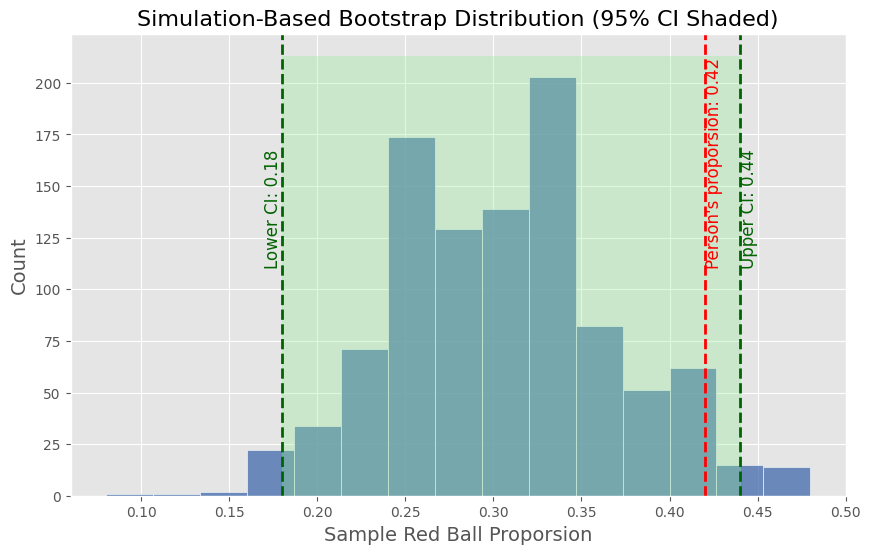

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))


ax.hist(bootstrap_distribution_counts['Prop'], bins=15, edgecolor='white', color='#4c72b0', alpha=0.8)


ax.axvline(percentile_ci[0], color='darkgreen', linestyle='--', linewidth=2)
ax.axvline(percentile_ci[1], color='darkgreen', linestyle='--', linewidth=2)

ax.axvline(prop, color='red', linestyle='--', linewidth=2)

ax.fill_betweenx(
    y=[0, ax.get_ylim()[1]],
    x1=percentile_ci[0], x2=percentile_ci[1],
    color='lightgreen', alpha=0.3
)

# Adding text labels for the CI values
ax.text(percentile_ci[0], ax.get_ylim()[1] * 0.5, f"Lower CI: {percentile_ci[0]:.2f}", fontsize=12, color='darkgreen', ha='right', rotation = 90)
ax.text(percentile_ci[1], ax.get_ylim()[1] * 0.5, f"Upper CI: {percentile_ci[1]:.2f}", fontsize=12, color='darkgreen', ha='left', rotation = 90)

ax.text(prop, ax.get_ylim()[1] * 0.5, f"Person's proporsion: {prop:.2f}", fontsize=12, color='red', ha='left', rotation = 90)

ax.set_title('Simulation-Based Bootstrap Distribution (95% CI Shaded)', fontsize=16)
ax.set_xlabel('Sample Red Ball Proporsion', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

✨ ✨ Thus, if we had a different sample of 50 balls and constructed a different confidence interval, would it necessarily contain  𝑝=0.42  as well!!!

Now repeat this process 100 more times:
  - we take 100 virtual samples from the bowl
  - construct 100 95% confidence intervals.

In [ ]:
prop

0.42

In [ ]:
# Function to create a confidence interval for a given sample - Percentile method
def create_ci(sample, prop):
    bootstrap_distribution = pd.DataFrame({
        'replicate': np.repeat(np.arange(1, 1001), len(sample)),
        'color': np.random.choice(sample, size=len(sample) * 1000, replace=True)
    })
    bootstrap_distribution_red = bootstrap_distribution[bootstrap_distribution['color'] == 'red']
    bootstrap_distribution_counts = (
        bootstrap_distribution_red.groupby('replicate')['color'].count().reset_index(name='count')
    )
    bootstrap_distribution_counts['Prop'] = bootstrap_distribution_counts['count'] / len(sample)
    percentile_ci = np.percentile(bootstrap_distribution_counts['Prop'], [2.5, 97.5])
    return percentile_ci

In [ ]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_sample_1.csv'
bowl_sample_1 = pd.read_csv(path)
bowl_sample_1

,color
0,white
1,white
2,red
3,red
4,white
5,white
6,red
7,white
8,white
9,white


In [ ]:
bowl_sample_1_red = bowl_sample_1[bowl_sample_1['color'] == 'red']
bowl_sample_1_red
prop = len(bowl_sample_1_red)/len(bowl_sample_1)
print(f"The population proportion of the Sample 1 is : {prop}")

The population proportion of the Sample 1 is : 0.42


In [ ]:
bowl_sample_1_list = bowl_sample_1['color'].tolist()
bowl_sample_1_list

['white',
 'white',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'white',
 'red',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'red',
 'red',
 'red',
 'white',
 'red',
 'white',
 'red',
 'white',
 'red',
 'white',
 'red',
 'red',
 'red',
 'white']

In [ ]:
num_samples = 10 # Number of virtual samples

true_prop = prop # True proportion of red balls

# Store confidence intervals and capture information
cis = []
captures = []

# Create num_samples virtual samples and confidence intervals
for _ in range(num_samples):
    virtual_sample = np.random.choice(bowl_sample_1_list, size=50, replace=True)
    virtual_sample_df = pd.DataFrame({'color': virtual_sample})
    virtual_sample = virtual_sample_df['color'].tolist()
    ci = create_ci(virtual_sample, true_prop)
    cis.append(ci)
    captures.append(true_prop >= ci[0] and true_prop <= ci[1])

In [ ]:
virtual_sample # only last one is saved in this variable

['white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'red',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'red',
 'white',
 'red',
 'white',
 'red',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white']

In [ ]:
virtual_sample_df # only last one is saved in this variable

,color
0,white
1,white
2,white
3,white
4,white
5,white
6,white
7,red
8,white
9,white


In [ ]:
ci # only last one is saved in this variable

array([0.12, 0.36])

In [ ]:
cis # Each iteration is saved in this variable

[array([0.42, 0.7 ]),
 array([0.22, 0.48]),
 array([0.22, 0.48]),
 array([0.26, 0.52]),
 array([0.26, 0.54]),
 array([0.36, 0.64]),
 array([0.2395, 0.5   ]),
 array([0.22, 0.48]),
 array([0.3 , 0.58]),
 array([0.12, 0.36])]

In [ ]:
captures # True if true_prop intersects with this ci

[np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.False_]

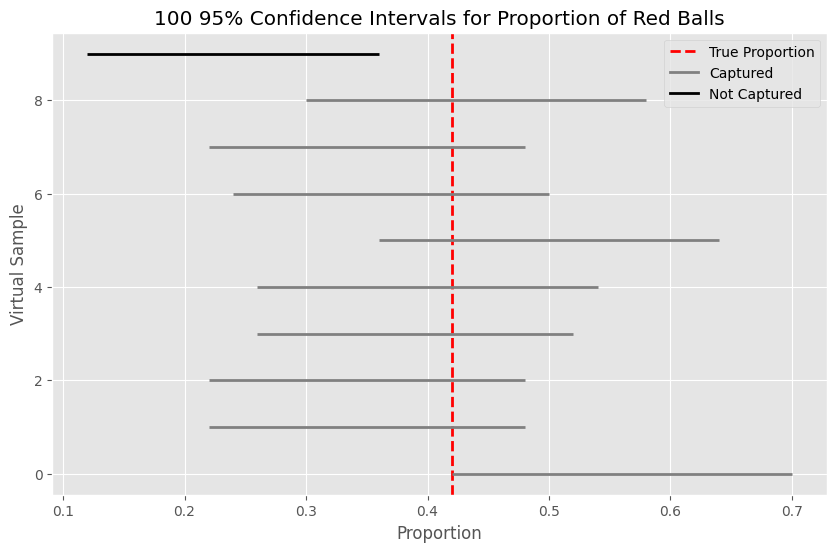

In [ ]:
from matplotlib.lines import Line2D

# Plotting the results
plt.figure(figsize=(10, 6))
plt.axvline(true_prop, color='red', linestyle='--', linewidth=2, label=f'True Proportion: {true_prop:.2f}')

for i, ci in enumerate(cis):
    color = 'grey' if captures[i] else 'black'
    plt.hlines(i, ci[0], ci[1], color=color, linewidth=2)


# Custom legend for captured and not captured
legend_elements = [
    Line2D([0], [0], color='red', linestyle='--', lw=2, label='True Proportion'),
    Line2D([0], [0], color='grey', lw=2, label='Captured'),
    Line2D([0], [0], color='black', lw=2, label='Not Captured'),
]

plt.xlabel("Proportion")
plt.ylabel("Virtual Sample")
plt.title("100 95% Confidence Intervals for Proportion of Red Balls")
plt.legend(handles=legend_elements)
plt.show()


In [ ]:
win_rate = (sum(captures)/len(cis))*100
win_rate

np.float64(90.0)

In [ ]:
print(f"Win rate: {win_rate:.2f}%")

Win rate: 90.00%


 In other words, 92% (win_rate) of the time,  our nets caught the fish, whereas 8% of our nets didn’t!. (We used the Percentile method to calculate teh CIs)

 Now, we repeate the same using - 'Standard error method'

In [ ]:
# Function to create a confidence interval for a given sample - Standard Error method
def create_ci_se(sample, prop):
    bootstrap_distribution = pd.DataFrame({
        'replicate': np.repeat(np.arange(1, 1001), len(sample)),
        'color': np.random.choice(sample, size=len(sample) * 1000, replace=True)
    })
    bootstrap_distribution_red = bootstrap_distribution[bootstrap_distribution['color'] == 'red']
    bootstrap_distribution_counts = (
        bootstrap_distribution_red.groupby('replicate')['color'].count().reset_index(name='count')
    )
    bootstrap_distribution_counts['Prop'] = bootstrap_distribution_counts['count'] / len(sample)
    sample_mean = bootstrap_distribution_counts['Prop'].mean()
    standard_error = bootstrap_distribution_counts['Prop'].std()
    ci_lower = sample_mean - 1.282 * standard_error  # this 1.96 - because 95% CI
    ci_upper = sample_mean + 1.282 * standard_error  # this 1.96 - because 95% CI
    return (ci_lower, ci_upper)

In [ ]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_sample_1.csv'
bowl_sample_1 = pd.read_csv(path)
bowl_sample_1_red = bowl_sample_1[bowl_sample_1['color'] == 'red']
prop = len(bowl_sample_1_red) / len(bowl_sample_1)
bowl_sample_1_list = bowl_sample_1['color'].tolist()

In [ ]:
num_samples = 100  # Number of virtual samples
true_prop = prop  # True proportion of red balls

cis = []
captures = []

for _ in range(num_samples):
    virtual_sample = np.random.choice(bowl_sample_1_list, size=50, replace=True)
    virtual_sample_df = pd.DataFrame({'color': virtual_sample})
    virtual_sample = virtual_sample_df['color'].tolist()
    ci = create_ci_se(virtual_sample, true_prop)
    cis.append(ci)
    captures.append(true_prop >= ci[0] and true_prop <= ci[1])

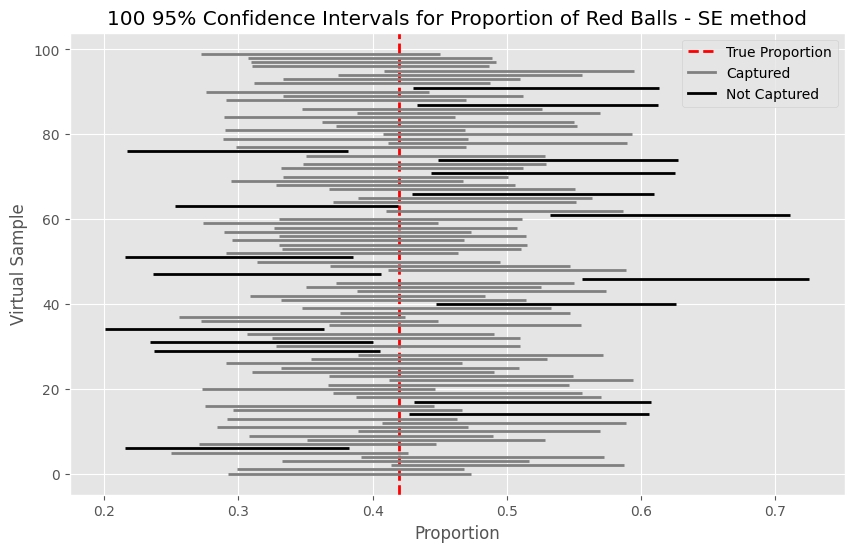

Win rate: 82.00%


In [ ]:
plt.figure(figsize=(10, 6))
plt.axvline(true_prop, color='red', linestyle='--', linewidth=2, label=f'True Proportion: {true_prop:.2f}')
for i, ci in enumerate(cis):
    color = 'grey' if captures[i] else 'black'
    plt.hlines(i, ci[0], ci[1], color=color, linewidth=2)

legend_elements = [
    Line2D([0], [0], color='red', linestyle='--', lw=2, label='True Proportion'),
    Line2D([0], [0], color='grey', lw=2, label='Captured'),
    Line2D([0], [0], color='black', lw=2, label='Not Captured'),
]
plt.xlabel("Proportion")
plt.ylabel("Virtual Sample")
plt.title("100 95% Confidence Intervals for Proportion of Red Balls - SE method")
plt.legend(handles=legend_elements)
plt.show()

win_rate = (sum(captures) / len(cis)) * 100
print(f"Win rate: {win_rate:.2f}%")


In [ ]:
from scipy.stats import norm

# Function to calculate the critical value (Z) for any confidence level
def get_critical_value(confidence_level):
    alpha = 1 - confidence_level
    z_value = norm.ppf(1 - alpha / 2)
    return z_value


ci_80 = get_critical_value(0.80)
ci_90 = get_critical_value(0.90)
ci_95 = get_critical_value(0.95)
ci_99 = get_critical_value(0.99)

print(f"80% CI Critical Value (Z): ±{ci_80:.3f}")
print(f"90% CI Critical Value (Z): ±{ci_90:.3f}")
print(f"95% CI Critical Value (Z): ±{ci_95:.3f}")
print(f"99% CI Critical Value (Z): ±{ci_99:.3f}")

80% CI Critical Value (Z): ±1.282
90% CI Critical Value (Z): ±1.645
95% CI Critical Value (Z): ±1.960
99% CI Critical Value (Z): ±2.576


Why the *80% Confidence Interval (CI)* Has a Lower Win Rate:

* The *win_rate* here means the probability that the confidence interval captures the true population parameter.
* An *80% CI* is *narrower* than a 95% or 99% CI because it covers only the *middle 80%* of the distribution.
* This means it is *more precise* (narrower range) but has a *higher chance of missing* the true parameter.

* A *95% CI* is calculated using:

  $$
  \bar{x} \pm 1.96 \times SE
  $$

  This means it captures the middle *95%* of the bootstrap distribution, leaving *2.5% in each tail*.

* An *80% CI* is calculated using:

  $$
  \bar{x} \pm 1.282 \times SE
  $$

  This means it captures only the middle *80%* of the distribution, leaving *10% in each tail*.


In a simulation, an 80% CI will capture the true value in only 80% of trials on average, while a 95% CI will capture it in 95% of trials.


Precise and shorthand interpretation:
  - If we repeated our sampling procedure a large number of times, we expect about 95% of the resulting confidence intervals to capture the value of the population parameter.
  - We can expect our confidence intervals to include the true population parameter about 95% of the time.
  - We are 95% “confident” that a 95% confidence interval captures the value of the population parameter.


  >Conclusion on pennies : We are 95% “confident” that the true mean year of pennies in circulation in 2019 is somewhere between 1991.24 and 1999.42.

In [ ]:

from scipy.stats import norm

# Function to calculate the critical value (Z) for any confidence level
def get_critical_value(confidence_level):
    alpha = 1 - confidence_level
    z_value = norm.ppf(1 - alpha / 2)
    return z_value

# Function to create a confidence interval using the standard error method
def create_ci_se(sample, confidence_level):
    bootstrap_distribution = pd.DataFrame({
        'replicate': np.repeat(np.arange(1, 1001), len(sample)),
        'color': np.random.choice(sample, size=len(sample) * 1000, replace=True)
    })
    bootstrap_distribution_red = bootstrap_distribution[bootstrap_distribution['color'] == 'red']
    bootstrap_distribution_counts = (
        bootstrap_distribution_red.groupby('replicate')['color'].count().reset_index(name='count')
    )
    bootstrap_distribution_counts['Prop'] = bootstrap_distribution_counts['count'] / len(sample)
    sample_mean = bootstrap_distribution_counts['Prop'].mean()
    standard_error = bootstrap_distribution_counts['Prop'].std()
    critical_value = get_critical_value(confidence_level)
    ci_lower = sample_mean - critical_value * standard_error
    ci_upper = sample_mean + critical_value * standard_error
    return (ci_lower, ci_upper)

# Load bowl data
bowl_data = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_n.csv'
bowl = pd.read_csv(bowl_data)
bowl_red = bowl[bowl['color'] == 'red']
true_prop = len(bowl_red) / len(bowl)

# Load sample data
path = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_sample_1.csv'
bowl_sample_1 = pd.read_csv(path)
bowl_sample_1_list = bowl_sample_1['color'].tolist()


confidence_levels = [0.80, 0.90, 0.95, 0.99]
num_samples = 30

for confidence_level in confidence_levels:
    cis = []
    for _ in range(num_samples):
        virtual_sample = np.random.choice(bowl_sample_1_list, size=50, replace=True)
        ci = create_ci_se(virtual_sample, confidence_level)
        cis.append(ci)

    #Here you would add code to calculate the widths and visualize the intervals.
    # Example:
    widths = [ci[1]-ci[0] for ci in cis]
    print(f"Confidence Level: {confidence_level*100}%")
    print(f"Average Width: {np.mean(widths)}")
    # Add your visualization code here (matplotlib, etc.)



Confidence Level: 80.0%
Average Width: 0.17661920348250237
Confidence Level: 90.0%
Average Width: 0.22796893888209765
Confidence Level: 95.0%
Average Width: 0.2735381835293597
Confidence Level: 99.0%
Average Width: 0.3556888180014684


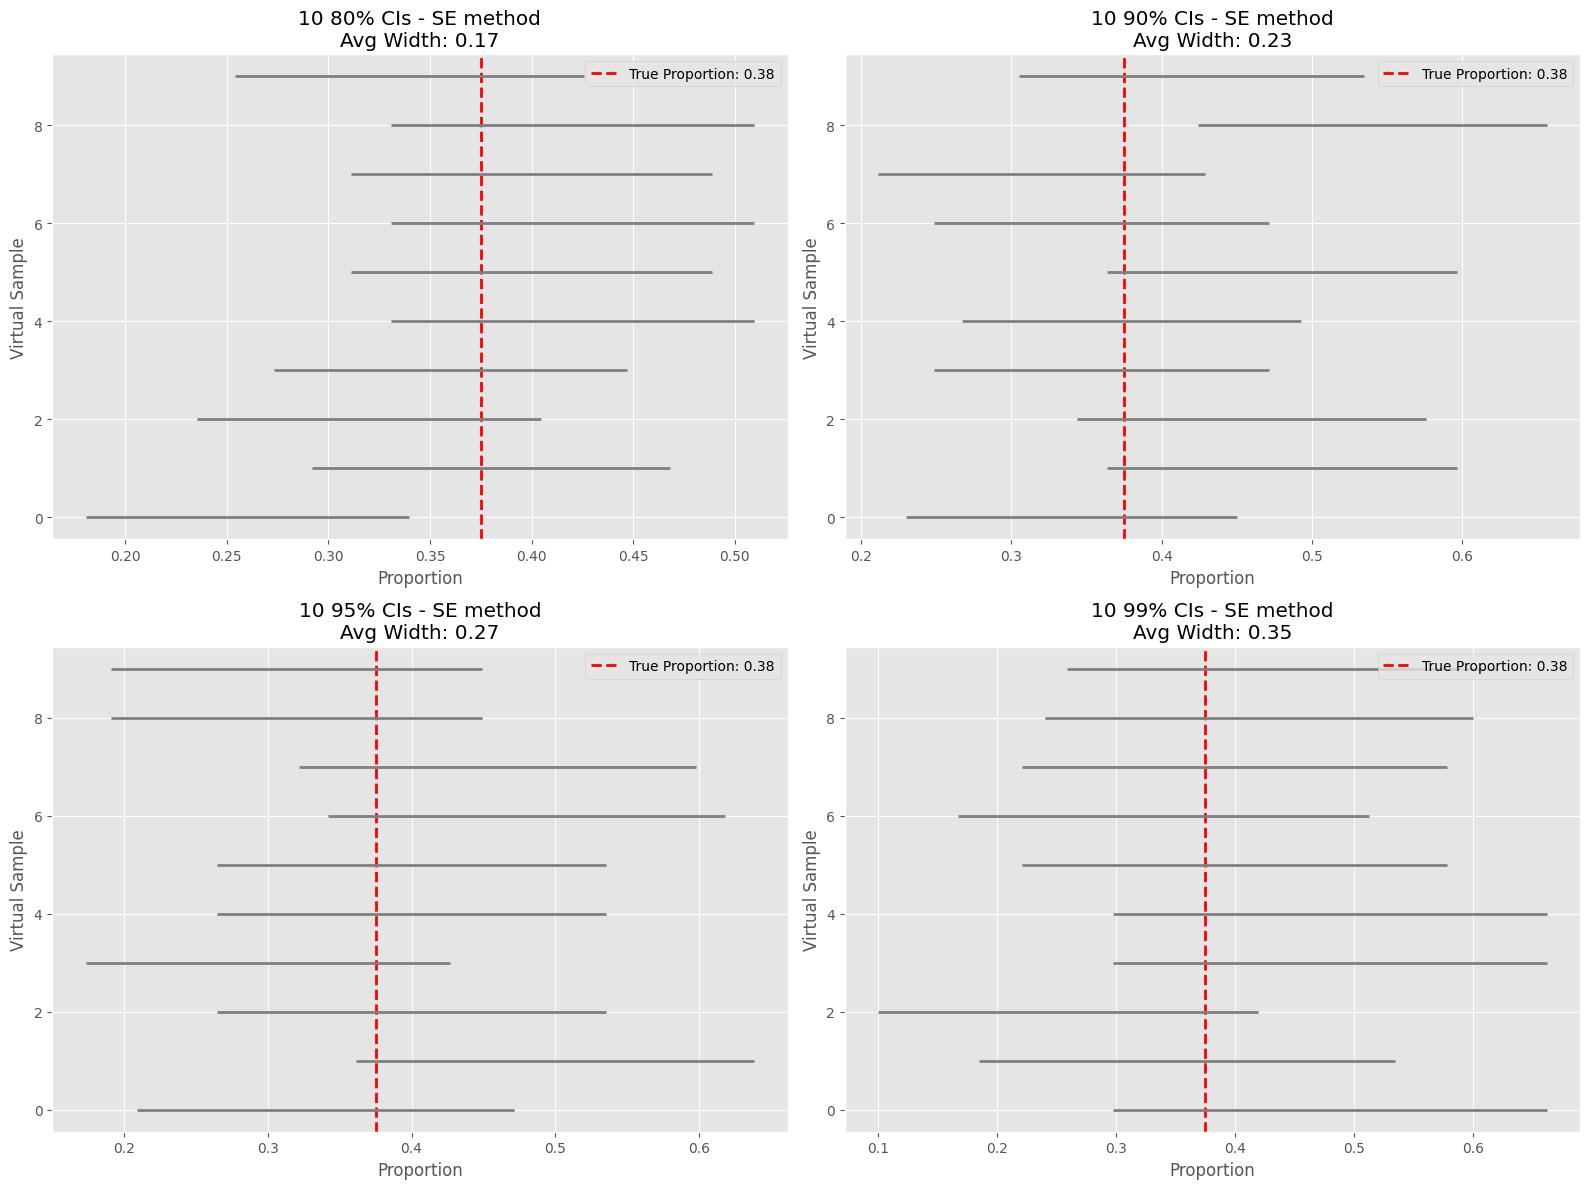

In [ ]:
from scipy.stats import norm

# Function to create confidence intervals using Standard Error Method
def create_ci_se(sample, confidence_level):
    sample_prop = np.sum(sample == 'red') / len(sample)
    se = np.sqrt((sample_prop * (1 - sample_prop)) / len(sample))
    z_value = norm.ppf(1 - (1 - confidence_level) / 2)
    lower_ci = sample_prop - z_value * se
    upper_ci = sample_prop + z_value * se
    return lower_ci, upper_ci

# # Sample data
# bowl_sample_1_list = ['red'] * 30 + ['blue'] * 20  # 30 red, 20 blue
# true_prop = 0.6  # True proportion of red balls

# Confidence Levels and Matrix Setup
confidence_levels = [0.80, 0.90, 0.95, 0.99]
num_samples = 10
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.ravel()  # Flattening the 2x2 grid

# Looping through each confidence level
for idx, confidence_level in enumerate(confidence_levels):
    cis = []
    widths = []

    for _ in range(num_samples):
        virtual_sample = np.random.choice(bowl_sample_1_list, size=50, replace=True)
        virtual_sample = np.array(virtual_sample)
        ci = create_ci_se(virtual_sample, confidence_level)
        cis.append(ci)
        widths.append(ci[1] - ci[0])

    # Plotting each subplot
    ax = axs[idx]
    ax.axvline(true_prop, color='red', linestyle='--', linewidth=2, label=f'True Proportion: {true_prop:.2f}')


    for i, ci in enumerate(cis):
        ax.hlines(i, ci[0], ci[1], color='grey', linewidth=2)

    ax.set_xlabel("Proportion")
    ax.set_ylabel("Virtual Sample")
    ax.set_title(f"{num_samples} {int(confidence_level * 100)}% CIs - SE method\nAvg Width: {np.mean(widths):.2f}")
    ax.legend()

plt.tight_layout()
plt.show()


Higher confidence levels tend to produce wider confidence intervals.

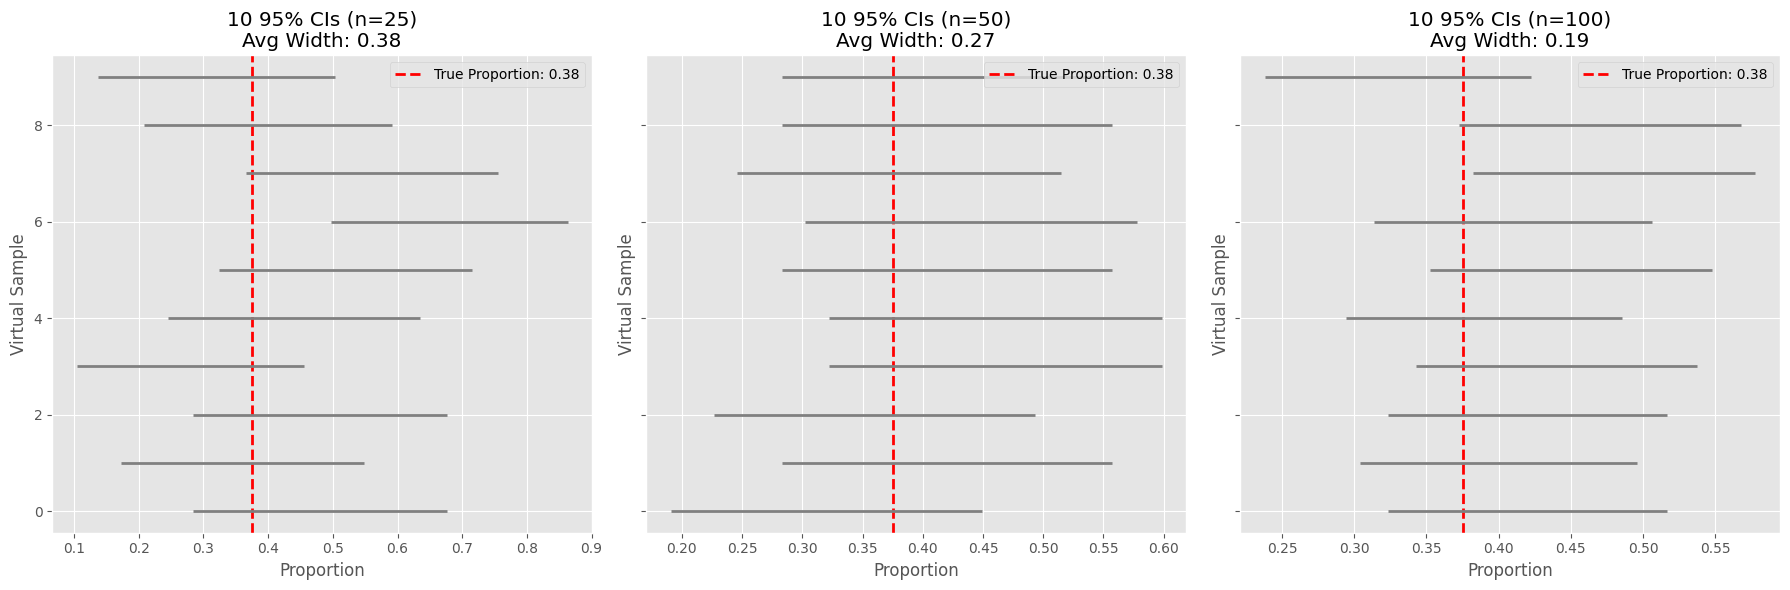

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Function to create confidence intervals using Standard Error Method
def create_ci_se(sample, confidence_level):
    sample_prop = np.sum(sample == 'red') / len(sample)
    se = np.sqrt((sample_prop * (1 - sample_prop)) / len(sample))
    z_value = norm.ppf(1 - (1 - confidence_level) / 2)
    lower_ci = sample_prop - z_value * se
    upper_ci = sample_prop + z_value * se
    return lower_ci, upper_ci


# Sample sizes to consider
sample_sizes = [25, 50, 100]
confidence_level = 0.95
num_samples_per_size = 10

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots
for i, sample_size in enumerate(sample_sizes):
  cis = []
  widths = []
  for _ in range(num_samples_per_size):
    virtual_sample = np.random.choice(bowl_sample_1_list, size=sample_size, replace=True)
    virtual_sample = np.array(virtual_sample)
    ci = create_ci_se(virtual_sample, confidence_level)
    cis.append(ci)
    widths.append(ci[1]-ci[0])

  ax = axes[i]  # Select the current subplot
  ax.axvline(true_prop, color='red', linestyle='--', linewidth=2, label=f'True Proportion: {true_prop:.2f}')

  for j, ci in enumerate(cis):
    ax.hlines(j, ci[0], ci[1], color='grey', linewidth=2)

  ax.set_xlabel("Proportion")
  ax.set_ylabel("Virtual Sample")
  ax.set_title(f"{num_samples_per_size} {int(confidence_level * 100)}% CIs (n={sample_size})\nAvg Width: {np.mean(widths):.2f}")
  ax.legend()

plt.tight_layout()
plt.show()


Larger sample sizes tend to produce narrower confidence intervals.